Importing the Dependencies

In [252]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Data Collection & Analysis

In [253]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('datasets/parkinson_data.csv')

In [254]:
# printing the first 5 rows of the dataframe

parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [255]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(195, 24)

In [256]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [257]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [258]:
# getting some statistical measures about the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [259]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

1  --> Parkinson's Positive

0 --> Healthy


In [260]:
# grouping the data bas3ed on the target variable
parkinsons_data.groupby('status').mean(numeric_only=True)


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


Data Pre-Processing

Separating the features & Target

In [261]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']

In [262]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [263]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


Splitting the data to training data & Test data

In [264]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, Y)

In [265]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=2)

In [266]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (235, 22) (59, 22)


Data Standardization

In [267]:
print(X_train)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
244   244.158219    258.501525    229.845757        0.002299   
53    129.336000    139.867000    118.604000        0.004900   
170   244.990000    272.210000    239.170000        0.004510   
23    173.917000    192.735000     86.180000        0.004760   
98    125.791000    140.557000     96.206000        0.013780   
..           ...           ...           ...             ...   
75    110.707000    122.611000    105.007000        0.005160   
22    167.930000    193.221000     79.068000        0.004420   
72    120.080000    139.710000    111.208000        0.004050   
15    142.167000    217.455000     83.159000        0.003690   
168   197.569000    217.627000     90.794000        0.008030   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
244          0.000009  0.001219  0.001434    0.003647       0.01550   
53           0.000040  0.001650  0.001830    0.004950       0.02498   
170          0.000

## **Feature Selection - With Correlation**


In [268]:
X_train_df = pd.DataFrame(X_train)
df_corr=X_train_df.corr()

In [269]:
X_train_df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

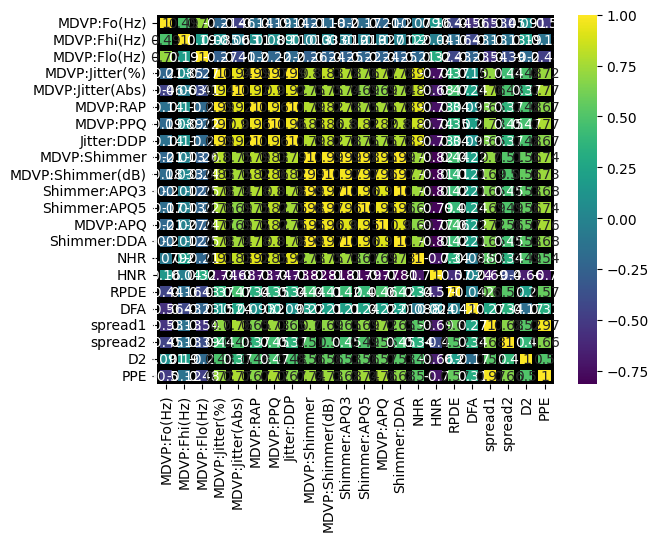

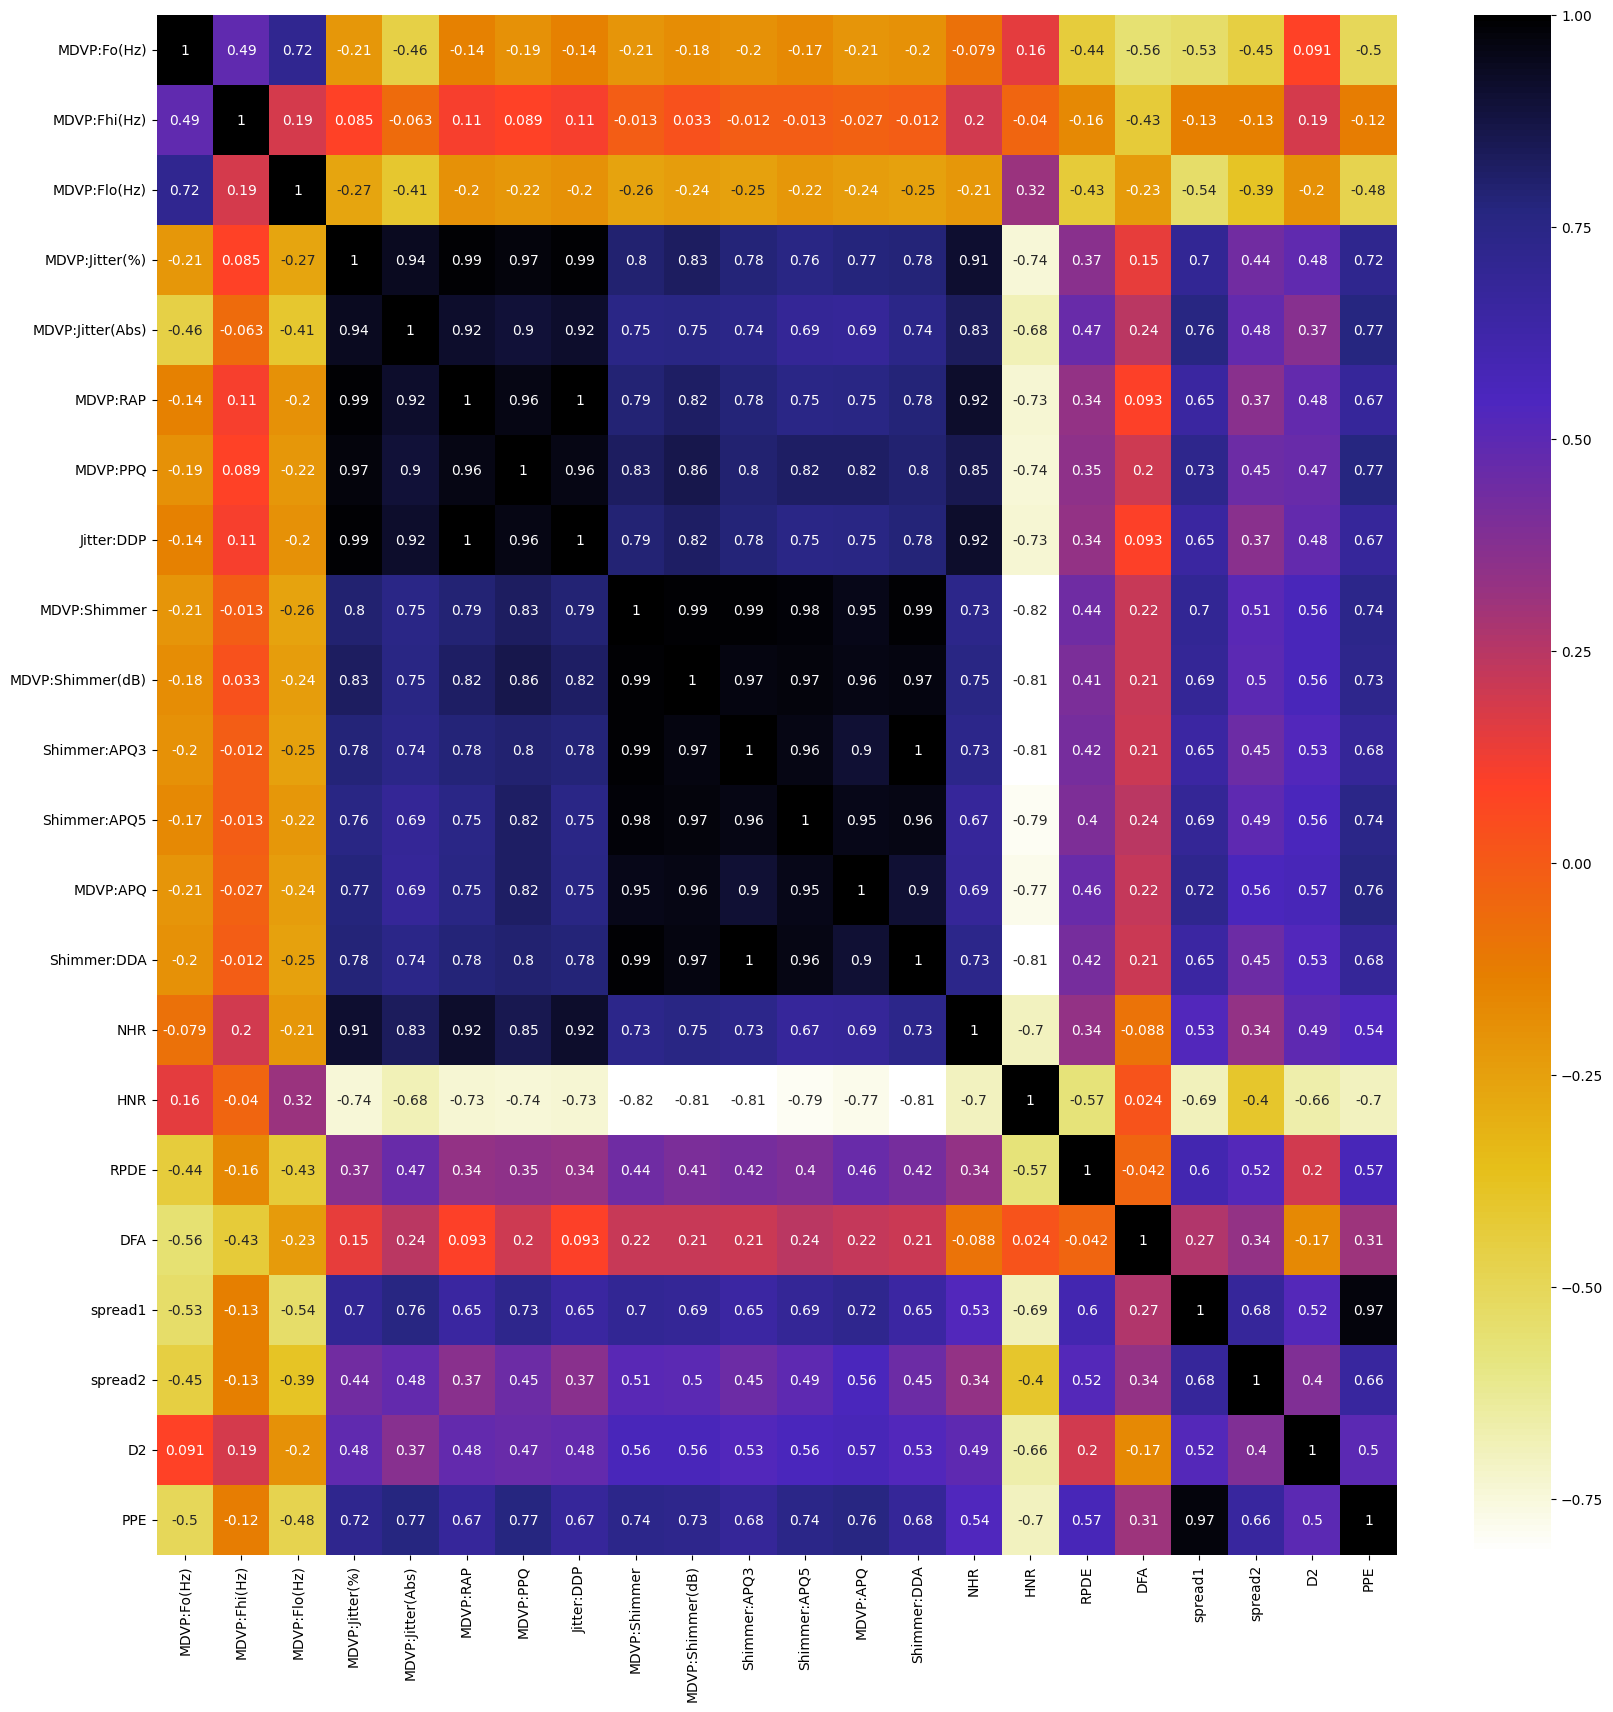

In [270]:
sns.heatmap(df_corr, cmap='viridis', linecolor='k', linewidths=4, annot=True)

plt.figure(figsize=(20,20))
cor = X_train_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [271]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [272]:
corr_features = correlation(X_train_df, 0.9)
len(set(corr_features))

11

In [273]:
corr_features


{'Jitter:DDP',
 'MDVP:APQ',
 'MDVP:Jitter(Abs)',
 'MDVP:PPQ',
 'MDVP:RAP',
 'MDVP:Shimmer(dB)',
 'NHR',
 'PPE',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:DDA'}

In [274]:
X_train = X_train.drop(corr_features,axis=1)
X_test = X_test.drop(corr_features,axis=1)

In [275]:
X_train.columns


Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Shimmer', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2'],
      dtype='object')

In [276]:
X_train.count()

MDVP:Fo(Hz)       235
MDVP:Fhi(Hz)      235
MDVP:Flo(Hz)      235
MDVP:Jitter(%)    235
MDVP:Shimmer      235
HNR               235
RPDE              235
DFA               235
spread1           235
spread2           235
D2                235
dtype: int64

In [277]:
X_train

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,HNR,RPDE,DFA,spread1,spread2,D2
244,244.158219,258.501525,229.845757,0.002299,0.01550,24.820685,0.449077,0.635353,-7.074574,0.114643,2.378735
53,129.336000,139.867000,118.604000,0.004900,0.02498,25.429000,0.420383,0.785714,-6.836811,0.269866,2.223719
170,244.990000,272.210000,239.170000,0.004510,0.01897,21.528000,0.522812,0.646818,-7.304500,0.171088,2.095237
23,173.917000,192.735000,86.180000,0.004760,0.04192,20.422000,0.537264,0.686894,-5.248776,0.210279,2.547508
98,125.791000,140.557000,96.206000,0.013780,0.04689,15.433000,0.571010,0.690892,-5.159169,0.202146,2.441612
...,...,...,...,...,...,...,...,...,...,...,...
75,110.707000,122.611000,105.007000,0.005160,0.02215,25.197000,0.463514,0.807217,-5.477592,0.315074,1.862092
22,167.930000,193.221000,79.068000,0.004420,0.04351,22.468000,0.619060,0.679834,-4.330956,0.262384,2.916777
72,120.080000,139.710000,111.208000,0.004050,0.01706,25.742000,0.495954,0.762959,-5.791820,0.329066,2.205024
15,142.167000,217.455000,83.159000,0.003690,0.01503,25.175000,0.565924,0.658245,-5.340115,0.210185,2.205546


Model Training

Support Vector Machine Model

In [278]:
model = svm.SVC(kernel='linear')

In [279]:
# training the SVM model with training data
model.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [280]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [281]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8468085106382979


In [282]:
# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [283]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7966101694915254


Building a Predictive System

In [284]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="rbf", C=1),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    cv_score = np.mean(cross_val_score(model, X_train, Y_train, cv=5))
    results[name] = {"Test Accuracy": accuracy, "CV Accuracy": cv_score}

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

# Best Model Performance
best_model = max(results, key=lambda k: results[k]["Test Accuracy"])
print(f"\nBest Model: {best_model}")
print(classification_report(Y_test, models[best_model].predict(X_test)))

                     Test Accuracy  CV Accuracy
Random Forest             0.932203     0.948936
SVM                       0.711864     0.676596
KNN                       0.847458     0.868085
Logistic Regression       0.745763     0.829787
Gradient Boosting         0.949153     0.936170

Best Model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        27
           1       1.00      0.91      0.95        32

    accuracy                           0.95        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.95      0.95      0.95        59



In [285]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "subsample": [0.8, 1.0]
}

# Initialize Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)

# Grid Search with 5-fold Cross-Validation
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Get the best model
best_gb = grid_search.best_estimator_

# Print best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate on test data
y_pred = best_gb.predict(X_test)
print("\nOptimized Gradient Boosting Performance:")
print(classification_report(Y_test, y_pred))


Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.9617021276595745

Optimized Gradient Boosting Performance:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        27
           1       0.97      0.91      0.94        32

    accuracy                           0.93        59
   macro avg       0.93      0.93      0.93        59
weighted avg       0.93      0.93      0.93        59



In [286]:
model=best_gb

Saving the trained model

In [287]:
import pickle

In [288]:
filename = 'models/parkinsons_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [289]:
# loading the saved model
loaded_model = pickle.load(open(filename, 'rb'))

In [290]:
feature_names=X_train.columns.tolist()
feature_names

['MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Shimmer',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2']

In [291]:
import joblib

# Load the model from the .pkl file
model = joblib.load('models/parkinsons_model.pkl')

# Check the type of the model
print(type(model))


<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>


In [292]:
#Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}


In [293]:
# Load the trained model from 'model.pkl'
with open("models/parkinsons_model.pkl", "rb") as file:
    rf = pickle.load(file)


# Example new input (Replace with actual values)
new_input_data = np.array([[119.992,157.302,74.997,0.00784,0.426,0.02182,0.414783,0.815285,-4.813031,0.266482,2.301442]])  # Ensure 18 values

# Convert input to DataFrame (matching column names)
new_input_df = pd.DataFrame(new_input_data, columns=feature_names)

# Make prediction
prediction = rf.predict(new_input_df)

# Print predicted class
print(f"Predicted Class: {prediction[0]}")


Predicted Class: 1
